### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


### Overview
we will start by exploring the data

In [33]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import t
from scipy import stats
%matplotlib inline

In [34]:
#import the dataset and show the first 5 rows
df = pd.read_csv('stroopdata.csv')
print(df.shape)
df.head()

(24, 2)


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [35]:
## Let's look at the varibales type
df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


(1) What is the independent variable? What is the dependent variable?

#### Answer :
**independent variable: The type of test, whether the tests are  congruent or incongruent condition.**

**dependent variable: The response time to complete test in second.**

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

#### Answer:
The appropriate set hypotheses are:

μc : population mean of congruent values.

μi : population mean of incongruent values.

**Null Hypothesis:**

H0 - Congruency does not influence the time to complete the test.

**Alternate Hypothesis:**

H1 - Congruency influences the time to complete the test, incongruent task takes more time than congruent tasks.

H0: μi ≤ μc 

H1: μi > μc 



**Statistical test**:
- In this case the sample size is below 30 as shown befor (24 entries).

- The same participant is measured at two time points. we will make a comparison for the means of two related groups so we can determine the statistically significant difference between the two means.

- We assume that the distributions are nearly normal and we are going to compare two dependent samples of data .

- Therefore, we will conduct a Dependent t-test for Paired Samples.


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [36]:
#measure a central tendency of each independent variable
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


#### Answer :
The congruent sample has a mean of x̄C = 14.051 seconds and a standard deviation σC = 3.559 seconds.

The incongruent sample has a mean of x̄I = 22.016 seconds and a standard deviation σI = 4.797 seconds.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

#### Answer:

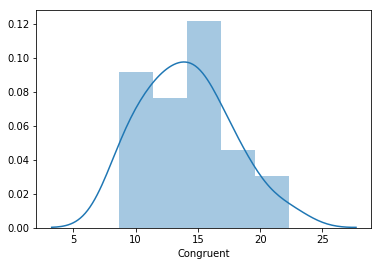

In [37]:
# Build the visualizations here
#First Visulaization of the Congruent  

sns.distplot(df['Congruent'])

The data seems more or less normally distributed , The Congruent task distribution of performance times seems to have a small peak around 15 seconds.


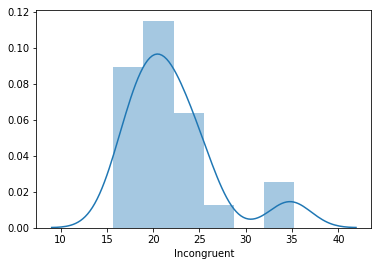

In [38]:
#Second Visulaization: of the Incongruent  
sns.distplot(df['Incongruent'])

There are some interesting data points on the upper end of this distribution that skew it right.

The incongruent task distribution of performance times seems to have a small peak around 35 seconds.

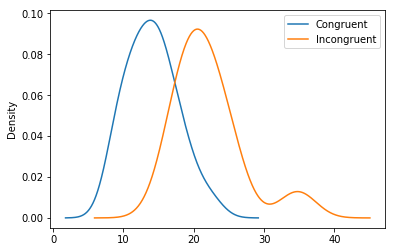

In [39]:
#Therd Visulaization KDE of Stroop effect
df.plot.kde()

The histogram plots, although in all graphs visually appear positively skewed.

The mean is close to the peak in both graphs (Incongruent, and Congruent) which would indicate a normal distribution with a similar variance.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

#### Answer :
We will start by performing some statistical calculations .

In [40]:
# Perform the statistical test here
#Sample size
print(df['Congruent'].size)
print(df['Incongruent'].size)

24
24


In [43]:
# Calculate the Degrees of Freedom (n -1)
dof = 23
#Calculate t-critical value for a 95% confidence level and 23 d.f.
t.ppf(.95, dof)

1.7138715277470473

In [44]:
# Calculations for a sample t-value[7] 
congruent_data = df["Congruent"]
incongruent_data = df["Incongruent"]

tvalueResults = stats.ttest_rel(incongruent_data, congruent_data)

# Calculate t-value and  P-value
tstat = tvalueResults[0]
pvalue = tvalueResults[1]
print ("t-value = " + '%0.2f' % tstat) 
print ("p-value = " + '%0.8f' % pvalue)

t-value = 8.02
p-value = 0.00000004


#### The Result :

For a confidence level of (95%) (α = 0.05) and (23) degrees of freedom, the t-critical value (one-tailed critical statistic value) is (1.7139) .
and the calculated t-value is (8.02) and the p-value is (0.00000004)

The point estimate for the difference of the means between the Incongruent and Congruent will be as follows.

In [45]:
# Calculte estimate point
mean_incongurant = 22.02
mean_congurent= 14.05

estimate_point = mean_incongurant - mean_congurent
print("The estimate point for the difference of the means between the Incongruent and Congruent is", estimate_point)

The estimate point for the difference of the means between the Incongruent and Congruent is 7.969999999999999


Finally, the standard deviation of the differences is calculated below.

In [46]:
# Calculate the standard deviation for congruent
df['Difference'] = df['Congruent'] - df['Incongruent']
print("The standard deviation for congruent {0:.4f}".format(df['Difference'].std(axis=0)))

The standard deviation for congruent 4.8648


The  calculated t-value for the difference between the congruent and incongruent conditions is (8.02)  which is greater than the critical t-value (1.7139).

In Addition, the p-value is less than the alpha level: p < 0.05; therefore, the null hypothesis is rejected.

The statistics matches what we expected, That it takes much less time to do the congruent task than it does to do the incongruent task.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--

### REFRENCES :

https://en.wikipedia.org/wiki/Stroop_effect

https://cyfar.org/types-statistical-tests

http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
